# EE-527: Machine Learning Laboratory

## Assignment 2

## Group Members
    1. RAJENDRA KUJUR (214161008)
    2. ROHIT RAJ SINGH CHAUHAN (214161009)

1. Generate a set of points around a line y = ax + b

In [1]:
# Returns the y value when passing the parameters to the function
def line(a, b, x):
    return a*x + b

(a) Choose a = 2 and b = 3

In [2]:
a = 2
b = 3

(b) Select the range for x as [−10, 10] and generate n = 100 values for x
in that interval.

In [3]:
import random
import numpy as np
x = [(random.random()-0.5)*20 for i in range(100)]
x = np.array(x)

(c) Compute the values of y for each x as y i = 2x i + 3.

In [4]:
# for each value of x generate y
y = [2*x_i + 3 for x_i in x]
y = np.array(y)

(d) Plot the line y = 2x + 3 in black color.

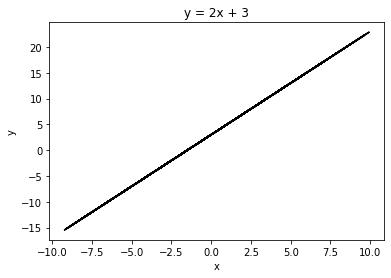

In [5]:
from matplotlib import pyplot as plt
plt.plot(x, y, color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 2x + 3')
plt.show()

(e) Generate a set of n points around the line using the equation
y i = 2x i + 3 + σN (0, 1)
where σ is the standard deviation and N (0, 1) is the zero-mean unity-
variance normal distribution

In [6]:
import numpy as np
# generate noisy points with the given formula (S.D = 1)
y_noise = [2 * x_i + 3 + (1)* np.random.normal(0, 1) for x_i in x]

(f) Show the scatter plot of these noisy points (in red color) on the same graph generated in step (d).

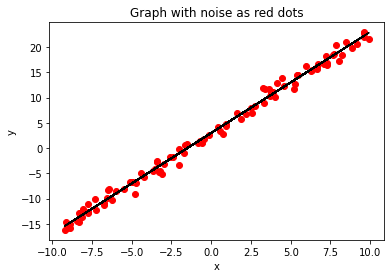

In [7]:
plt.plot(x, y, color = 'black')
plt.scatter(x, y_noise, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph with noise as red dots')
plt.show()

2. Plot the average error surface E for different values of a and b in the
interval of [−10 : 0.1 : 10].

(a) Vary both a and b in steps of 0.1 in the interval [−10, 10]

In [8]:
a = np.arange(-10, 10 + 0.1, 0.1)
b = np.arange(-10, 10 + 0.1, 0.1)

(b) Compute the element-wise error as e i = y i − ŷ i where ŷ i = ax i + b
and y i is computed using equation 1

In [9]:
# returns the difference between each element of list (returned type is also list)
def error(list_a, list_b):
    error_list = []
    for i in range(len(list_a)):
        error_list.append(list_a[i] - list_b[i])
    return error_list

(c) Compute the average error as
n
E =
1 X 2

In [10]:
# returns the average error as per the given formula
def average_error(e_i):
    
    squared_sum_error = 0.0
    for error in e_i:
        squared_sum_error += (error**2)
    
    return squared_sum_error/len(e_i)

(d) Compute the average error values for all combinations of a and b.

In [11]:
# function to generate the error value for a and b
def f(a, b):
    y_i = [line(a, b, x_i) for x_i in x]
    e_i = error(y_i, y_noise)
    E = average_error(e_i)
    return E

a, b =  np.meshgrid(a, b)
F = f(a, b)

(e) Plot the error surface with the values of a along x-axis, that of b
along y-axis and E along z-axis.

/tmp/ipykernel_5735/1362206666.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


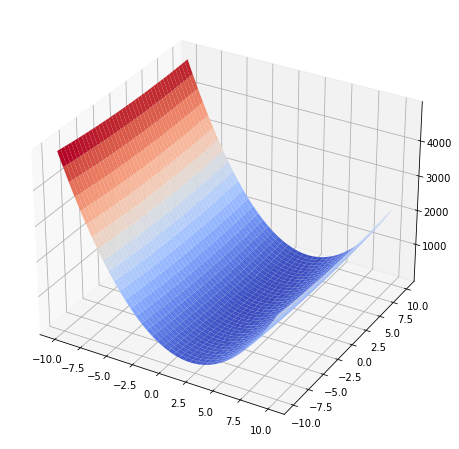

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=[12,8])
ax = plt.gca(projection = '3d')
ax.plot_surface(a, b, F, cmap = cm.coolwarm)
plt.show()

3. Solve for a and b using Pseudo-inverse based approach on the points gen-
erated in question 1.

In [13]:
# creating a unit vector 
x0 = np.ones(len(x))

# concatenating with the x values and making matrix in the form [1 x_i]
X = np.concatenate((np.matrix(x0).T, np.matrix(x).T), axis=1)

# calculating weight for each unnknown variable by multiplying inverse of X and y_noise i.e. generated in equation (1)
weight_matrix = np.dot(np.linalg.pinv(X),y_noise)

# extracting the feature weights using reshape function
print(f'a : {np.asarray(weight_matrix).reshape(-1)[1]}')
print(f'b : {np.asarray(weight_matrix).reshape(-1)[0]}')

a : 2.000173618254884
b : 2.951842167335231


4. Solve for a and b using the Gradient Descent approach where the values
of p = (a, b) T in the (k + 1) th iteration is updated as
p k+1 = p k − η∇ p E| p=p k
(3)
Vary the update rate η and the initial values (a 0 , b 0 ) and note the final
solution after 100 iterations. Plot the trajectory of the solutions (a k , b k )
for varying (a 0 , b 0 , η) on the contour plot of E on (a, b) plane.

Number of testcase : 5


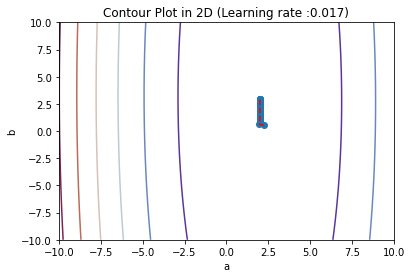

For learning rate : 0.017 a0 : 2.000109165166551, b0 : 2.9198427978341637


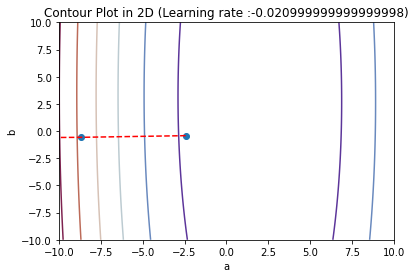

For learning rate : -0.020999999999999998 a0 : -2.353266956208269e+38, b0 : -3.204887050338914e+35


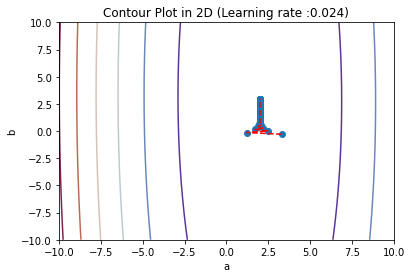

For learning rate : 0.024 a0 : 2.000034409564299, b0 : 2.9747339330935345


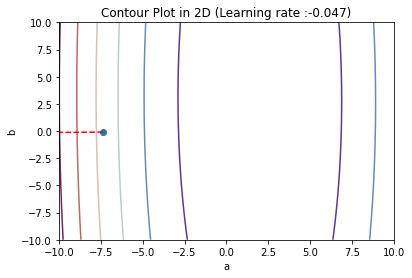

For learning rate : -0.047 a0 : -1.2442194115353287e+62, b0 : -1.6944880262267055e+59


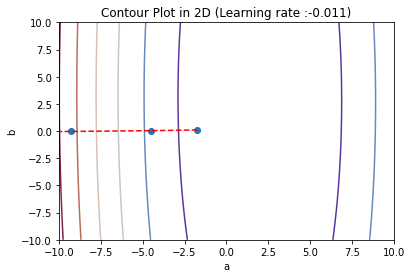

For learning rate : -0.011 a0 : -1.918027660621298e+24, b0 : -2.6121396875523056e+21


In [14]:
def gradient_descent(a0, b0, learning_rate):
    iterations = 100
    n = len(x)
    a_traj = np.empty(0)
    b_traj = np.empty(0)
    for i in range(iterations):
        # predicting y value based on assumption while executing first time, from n
        y_predicted = a0 * x + b0
        D_a = (-2/n) * sum(x * (y - y_predicted))
        D_b = (-2/n) * sum(y - y_predicted)
        # updating a0 and b0 for next iteration
        a0 = a0 - learning_rate * D_a
        b0 = b0 - learning_rate * D_b
        a_traj = np.append(a_traj, a0)
        b_traj = np.append(b_traj, b0)
    plt.contour(a, b, F, cmap = cm.twilight_shifted);
    plt.plot(a_traj, b_traj, color='red',linestyle='dashed')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.scatter(a_traj, b_traj)
    plt.title(f'Contour Plot in 2D (Learning rate :{learning_rate})')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.show()
    return a0, b0

# Execution begins here
testcase = int(input('Number of testcase : '))
for _ in range(testcase):
    a0 = 0.0 + round((random.random()-0.5), 2)
    b0 = 0.0 + round((random.random()-0.5), 2)
    learning_rate = 0.001 + round((random.random()-0.5)*0.1, 3)
    a0, b0 = gradient_descent(a0, b0, learning_rate)
    print(f'For learning rate : {learning_rate} a0 : {a0}, b0 : {b0}')

5.Consider the multi-modal function given by

/tmp/ipykernel_5735/688153499.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


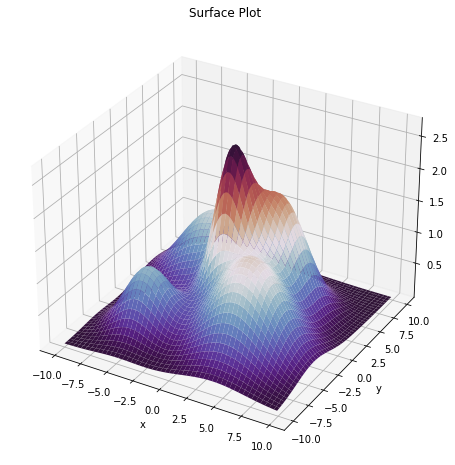

/tmp/ipykernel_5735/688153499.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


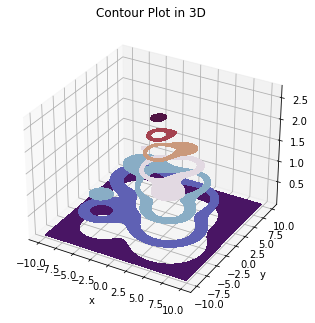

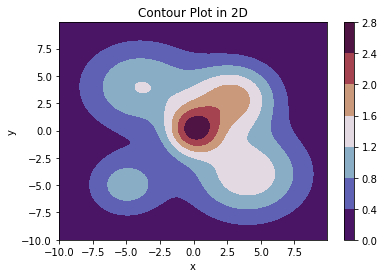

In [15]:
from math import e
def f(x, y):
    return 1.7 * e ** (-( ((x-3)**2/10) + ((y-3)**2/10) )) + e ** (-( ((x+5)**2/8) + ((y+5)**2/8) )) + 2*e**(-(x**2/4 + y**2/5)) + 1.5*e**(-( ((x-4)**2/18) + ((y+4)**2/16) )) + 1.2*e**(-( ((x+4)**2/18) + ((y-4)**2/16) ))


# Plotting in Surface plot
def surface_plot(x, y, z):
    fig = plt.figure(figsize=[12,8])
    ax = plt.gca(projection = '3d')
    ax.plot_surface(x, y, z, cmap = cm.twilight_shifted)
    plt.title('Surface Plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Plotting in Contour plot
def contour_plot(x, y, z):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.contourf(x, y, z, cmap = cm.twilight_shifted)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot in 3D')
    plt.show()


# Plotting in 2D Contour plot
def contour_2d_plot(x, y, z):
    cp = plt.contourf(x, y, z, cmap = cm.twilight_shifted);
    plt.colorbar(cp)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot in 2D')
    plt.show()


x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
x, y =  np.meshgrid(x, y)
z = f(x, y)
surface_plot(x, y, z)
contour_plot(x, y, z)
contour_2d_plot(x, y, z)